# 深度学习 实验2

本节课我们仍然使用上节课的线性模型，了解模型的过拟合与损失函数中的正则项。

## Task 1

读取数据文件 `train_data.csv` 和 `test_data.csv`，文件中列为 `label` 的表示标签，1 表示正例，0 表示负例，其余列为 $x$，取值均为 0 或 1。使用 `train_data.csv` 训练你的模型，并用 `test_data.csv` 进行测试。

模型仍使用上节课的线性模型

$$
\hat y_i=f(x_i)=w\cdot x_i+b
$$

请分别绘制出训练集上的损失与测试集上的损失随迭代次数变化的曲线。

$$
Loss=\frac{1}{n}\sum_{i=1}^n (f(x_i)-y_i)^2
$$

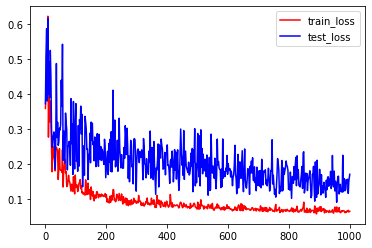

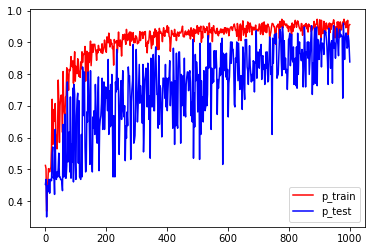

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def liner(w, b, x):
    return np.dot(w,x) + b
def loss(y, y_hat):
    return ((y_hat-y)**2)
def optimize(w, b, eta, y_hat, y, x):
    dw = (y_hat-y)*x*eta
    db = (y_hat-y)*eta
    return w-dw, b-db

eta = 0.01
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
epochs = np.linspace(1, 1000, num = 500, dtype = int)
train_losses = []
test_losses = []
p_tests = []
p_trains = []
for epoch in epochs:
    w = (-1 + 2*np.random.random(100))/10
    b = (-1 + 2*np.random.random())/10
    for i in range(epoch):
        x = train_data.sample().values
        y = x[0][100]
        x = x[0][:100]
        y_hat = liner(w, b, x.T)
        w, b = optimize(w, b, eta, y_hat, y, x)
    sum_test = 0
    for i in range(test_data.shape[0]):
        x = test_data.loc[i].values[:100]
        y = test_data.loc[i].values[100]
        y_hat = liner(w, b, x)
        loss_t = loss(y, y_hat)
        sum_test = sum_test + loss_t
    sum_test = sum_test / test_data.shape[0]
    test_losses.append(sum_test)
    sum_train = 0
    for i in range(train_data.shape[0]):
        x = train_data.loc[i].values[:100]
        y = train_data.loc[i].values[100]
        y_hat = liner(w, b, x)
        loss_t = loss(y, y_hat)
        sum_train = sum_train + loss_t
    sum_train = sum_train / train_data.shape[0]
    train_losses.append(sum_train)
#     print("when epoch = {}, loss_train = {}, loss_test = {}".format(epoch, sum_train, sum_test))
    cnt = 0
    for i in range(test_data.shape[0]):
        x = test_data.loc[i].values[:100]
        y = test_data.loc[i].values[100]
        y_hat = liner(w, b, x)
        if(y_hat>0.5 and y==1):
            cnt = cnt + 1
        elif(y_hat<0.5 and y==0):
            cnt = cnt + 1
    p_test = cnt/test_data.shape[0]
    p_tests.append(p_test)
    cnt = 0
    for i in range(train_data.shape[0]):
        x = train_data.loc[i].values[:100]
        y = train_data.loc[i].values[100]
        y_hat = liner(w, b, x)
        if(y_hat>0.5 and y==1):
            cnt = cnt + 1
        elif(y_hat<0.5 and y==0):
            cnt = cnt + 1
    p_train = cnt/train_data.shape[0]
    p_trains.append(p_train)
#     print("when epoch = {}, p_train = {}, p_test = {}".format(epoch, p_train, p_test))
plt.plot(epochs, train_losses, 'r', label='train_loss')
plt.plot(epochs, test_losses, 'b', label='test_loss')
plt.legend()
plt.show()
plt.plot(epochs, p_trains, 'r', label='p_train')
plt.plot(epochs, p_tests, 'b', label='p_test')
plt.legend()
plt.show()

## Task 2

不出意外，你会发现在 Task 1 中测试集上的损失明显大于训练集上的损失，这说明我们的模型出现了过拟合，下面我们在模型的损失函数中添加“正则项”

$$
Loss=\frac{1}{n}\sum_{i=1}^n (f(x_i)-y_i)^2+\alpha ||w||^2
$$

仍然可以使用随机梯度下降法，请自行推导迭代中需要的公式，并用上述损失函数重新训练与测试模型。

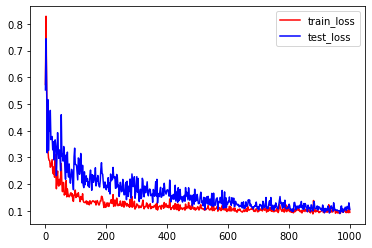

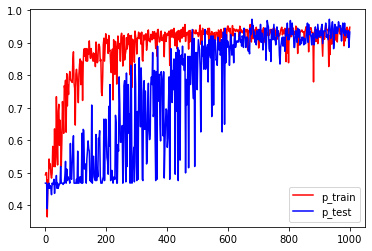

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def liner(w, b, x):
    return np.dot(w,x) + b
def loss(y, y_hat):
    return ((y_hat-y)**2)
def optimize(w, b, eta, y_hat, y, x, alpha):
    dw = (y_hat-y)*x*eta+alpha*w
    db = (y_hat-y)*eta
    return w-dw, b-db

eta = 0.01
alpha = 0.01
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
epochs = np.linspace(1, 1000, num = 500, dtype = int)
train_losses = []
test_losses = []
p_tests = []
p_trains = []
for epoch in epochs:
    w = (-1 + 2*np.random.random(100))/10
    b = (-1 + 2*np.random.random())/10
    for i in range(epoch):
        x = train_data.sample().values
        y = x[0][100]
        x = x[0][:100]
        y_hat = liner(w, b, x.T)
        w, b = optimize(w, b, eta, y_hat, y, x, alpha)
    sum_test = 0
    for i in range(test_data.shape[0]):
        x = test_data.loc[i].values[:100]
        y = test_data.loc[i].values[100]
        y_hat = liner(w, b, x)
        loss_t = loss(y, y_hat)
        sum_test = sum_test + loss_t
    sum_test = sum_test / test_data.shape[0]
    test_losses.append(sum_test)
    sum_train = 0
    for i in range(train_data.shape[0]):
        x = train_data.loc[i].values[:100]
        y = train_data.loc[i].values[100]
        y_hat = liner(w, b, x)
        loss_t = loss(y, y_hat)
        sum_train = sum_train + loss_t
    sum_train = sum_train / train_data.shape[0]
    train_losses.append(sum_train)
#     print("when epoch = {}, loss_train = {}, loss_test = {}".format(epoch, sum_train, sum_test))
    cnt = 0
    for i in range(test_data.shape[0]):
        x = test_data.loc[i].values[:100]
        y = test_data.loc[i].values[100]
        y_hat = liner(w, b, x)
        if(y_hat>0.5 and y==1):
            cnt = cnt + 1
        elif(y_hat<0.5 and y==0):
            cnt = cnt + 1
    p_test = cnt/test_data.shape[0]
    p_tests.append(p_test)
    cnt = 0
    for i in range(train_data.shape[0]):
        x = train_data.loc[i].values[:100]
        y = train_data.loc[i].values[100]
        y_hat = liner(w, b, x)
        if(y_hat>0.5 and y==1):
            cnt = cnt + 1
        elif(y_hat<0.5 and y==0):
            cnt = cnt + 1
    p_train = cnt/train_data.shape[0]
    p_trains.append(p_train)
#     print("when epoch = {}, p_train = {}, p_test = {}".format(epoch, p_train, p_test))
plt.plot(epochs, train_losses, 'r', label='train_loss')
plt.plot(epochs, test_losses, 'b', label='test_loss')
plt.legend()
plt.show()
plt.plot(epochs, p_trains, 'r', label='p_train')
plt.plot(epochs, p_tests, 'b', label='p_test')
plt.legend()
plt.show()

## Task 3

尝试使用不同的参数 $\alpha$ 进行测试，试分析损失函数中的正则项对模型效果的影响。

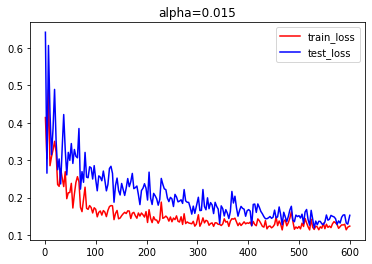

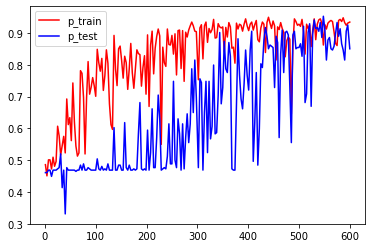

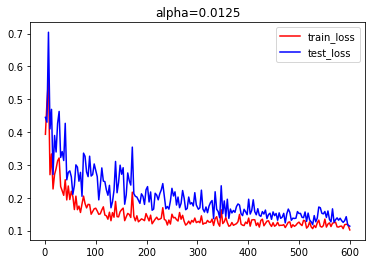

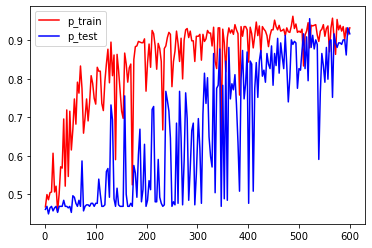

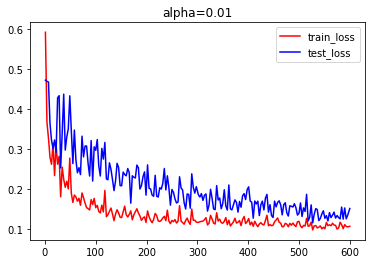

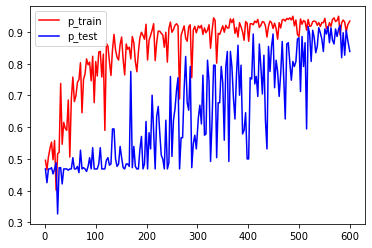

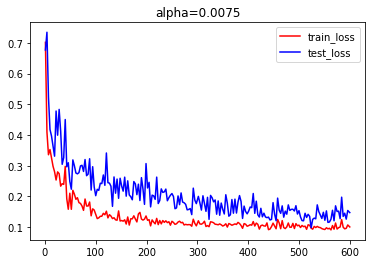

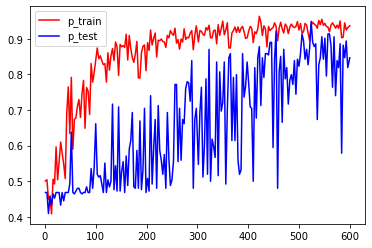

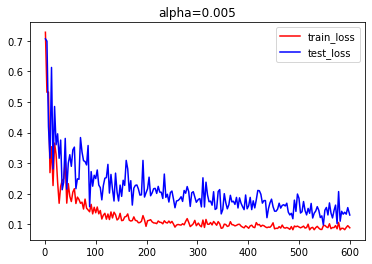

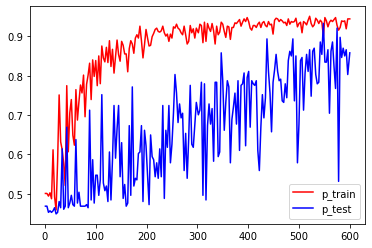

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def liner(w, b, x):
    return np.dot(w,x) + b
def loss(y, y_hat):
    return ((y_hat-y)**2)
def optimize(w, b, eta, y_hat, y, x, alpha):
    dw = (y_hat-y)*x*eta+alpha*w
    db = (y_hat-y)*eta
    return w-dw, b-db

eta = 0.01
alphas = [0.015, 0.0125, 0.01, 0.0075, 0.005]
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
epochs = np.linspace(1, 600, num = 200, dtype = int)
for alpha in alphas:
    train_losses = []
    test_losses = []
    p_tests = []
    p_trains = []
    for epoch in epochs:
        w = (-1 + 2*np.random.random(100))/10
        b = (-1 + 2*np.random.random())/10
        for i in range(epoch):
            x = train_data.sample().values
            y = x[0][100]
            x = x[0][:100]
            y_hat = liner(w, b, x.T)
            w, b = optimize(w, b, eta, y_hat, y, x, alpha)
        sum_test = 0
        for i in range(test_data.shape[0]):
            x = test_data.loc[i].values[:100]
            y = test_data.loc[i].values[100]
            y_hat = liner(w, b, x)
            loss_t = loss(y, y_hat)
            sum_test = sum_test + loss_t
        sum_test = sum_test / test_data.shape[0]
        test_losses.append(sum_test)
        sum_train = 0
        for i in range(train_data.shape[0]):
            x = train_data.loc[i].values[:100]
            y = train_data.loc[i].values[100]
            y_hat = liner(w, b, x)
            loss_t = loss(y, y_hat)
            sum_train = sum_train + loss_t
        sum_train = sum_train / train_data.shape[0]
        train_losses.append(sum_train)
    #     print("when epoch = {}, loss_train = {}, loss_test = {}".format(epoch, sum_train, sum_test))
        cnt = 0
        for i in range(test_data.shape[0]):
            x = test_data.loc[i].values[:100]
            y = test_data.loc[i].values[100]
            y_hat = liner(w, b, x)
            if(y_hat>0.5 and y==1):
                cnt = cnt + 1
            elif(y_hat<0.5 and y==0):
                cnt = cnt + 1
        p_test = cnt/test_data.shape[0]
        p_tests.append(p_test)
        cnt = 0
        for i in range(train_data.shape[0]):
            x = train_data.loc[i].values[:100]
            y = train_data.loc[i].values[100]
            y_hat = liner(w, b, x)
            if(y_hat>0.5 and y==1):
                cnt = cnt + 1
            elif(y_hat<0.5 and y==0):
                cnt = cnt + 1
        p_train = cnt/train_data.shape[0]
        p_trains.append(p_train)
    #     print("when epoch = {}, p_train = {}, p_test = {}".format(epoch, p_train, p_test))
    plt.title("alpha={}".format(alpha))
    plt.plot(epochs, train_losses, 'r', label='train_loss')
    plt.plot(epochs, test_losses, 'b', label='test_loss')
    plt.legend()
    plt.show()
    plt.plot(epochs, p_trains, 'r', label='p_train')
    plt.plot(epochs, p_tests, 'b', label='p_test')
    plt.legend()
    plt.show()